In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Load the dataset
titanic_data = pd.read_csv('/content/titanic.csv.csv')

In [ ]:
#check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [ ]:
titanic_data.drop(columns=['Cabin'], inplace=True)

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
missing_values_count_after = titanic_data.isnull().sum()
print(missing_values_count_after)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
import pandas as pd

In [ ]:
datapath = '/content/car.data'
car_data = pd.read_csv(datapath)

In [ ]:
car_names_path = '/content/car.names'
with open(car_names_path, 'r') as file:
    car_names = file.read().splitlines()

car_data.columns = car_names[:7]
print(car_data.head())

  1. Title: Car Evaluation Database        2. Sources:  \
0                             vhigh  vhigh           2   
1                             vhigh  vhigh           2   
2                             vhigh  vhigh           2   
3                             vhigh  vhigh           2   
4                             vhigh  vhigh           2   

     (a) Creator: Marko Bohanec  \
0                             2   
1                             2   
2                             2   
3                             2   
4                             2   

     (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)  \
0                                              small      
1                                              small      
2                                                med      
3                                                med      
4                                                med      

                 Blaz Zupan      (blaz.zupan@ijs.si)    (c) Date: June, 1997  
0     

In [ ]:
categorical_columns = car_data.columns.tolist()
print(categorical_columns)

['1. Title: Car Evaluation Database', '', '2. Sources:', '   (a) Creator: Marko Bohanec', '   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)', '               Blaz Zupan      (blaz.zupan@ijs.si)', '   (c) Date: June, 1997']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encode_data = car_data.copy()
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    label_encode_data[column] = le.fit_transform(car_data[column])
    label_encoders[column] = le
print(label_encode_data.head())

   1. Title: Car Evaluation Database     2. Sources:  \
0                                  3  3            0   
1                                  3  3            0   
2                                  3  3            0   
3                                  3  3            0   
4                                  3  3            0   

      (a) Creator: Marko Bohanec  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   

      (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)  \
0                                                  2       
1                                                  2       
2                                                  1       
3                                                  1       
4                                                  1       

                  Blaz Zupan      (blaz.zupan@ijs.si)     (c) Date: June, 1997  
0   

In [ ]:
one_hot_encoded_data = pd.get_dummies(car_data, columns=categorical_columns)
print(one_hot_encoded_data.head())

   1. Title: Car Evaluation Database_high  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   1. Title: Car Evaluation Database_low  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   1. Title: Car Evaluation Database_med  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   1. Title: Car Evaluation Database_vhigh  _high   _low   _med  _vhigh  \
0                                     True  False  False  False    True   
1                                     True  False

In [ ]:
print(label_encode_data.head())

   1. Title: Car Evaluation Database     2. Sources:  \
0                                  3  3            0   
1                                  3  3            0   
2                                  3  3            0   
3                                  3  3            0   
4                                  3  3            0   

      (a) Creator: Marko Bohanec  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   

      (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)  \
0                                                  2       
1                                                  2       
2                                                  1       
3                                                  1       
4                                                  1       

                  Blaz Zupan      (blaz.zupan@ijs.si)     (c) Date: June, 1997  
0   

In [ ]:
print(one_hot_encoded_data.head())

   1. Title: Car Evaluation Database_high  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   1. Title: Car Evaluation Database_low  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   1. Title: Car Evaluation Database_med  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   1. Title: Car Evaluation Database_vhigh  _high   _low   _med  _vhigh  \
0                                     True  False  False  False    True   
1                                     True  False

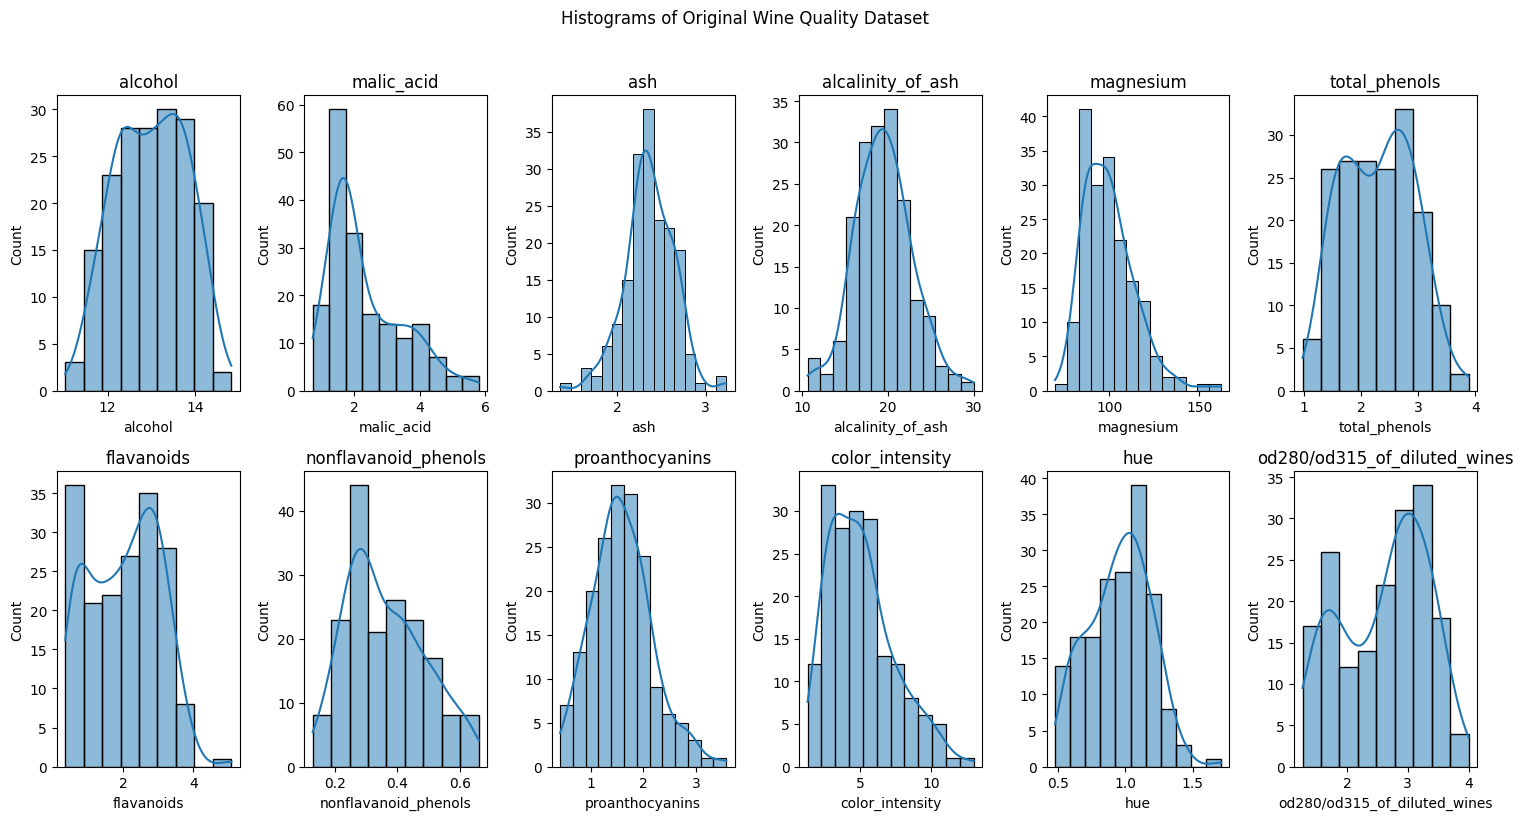

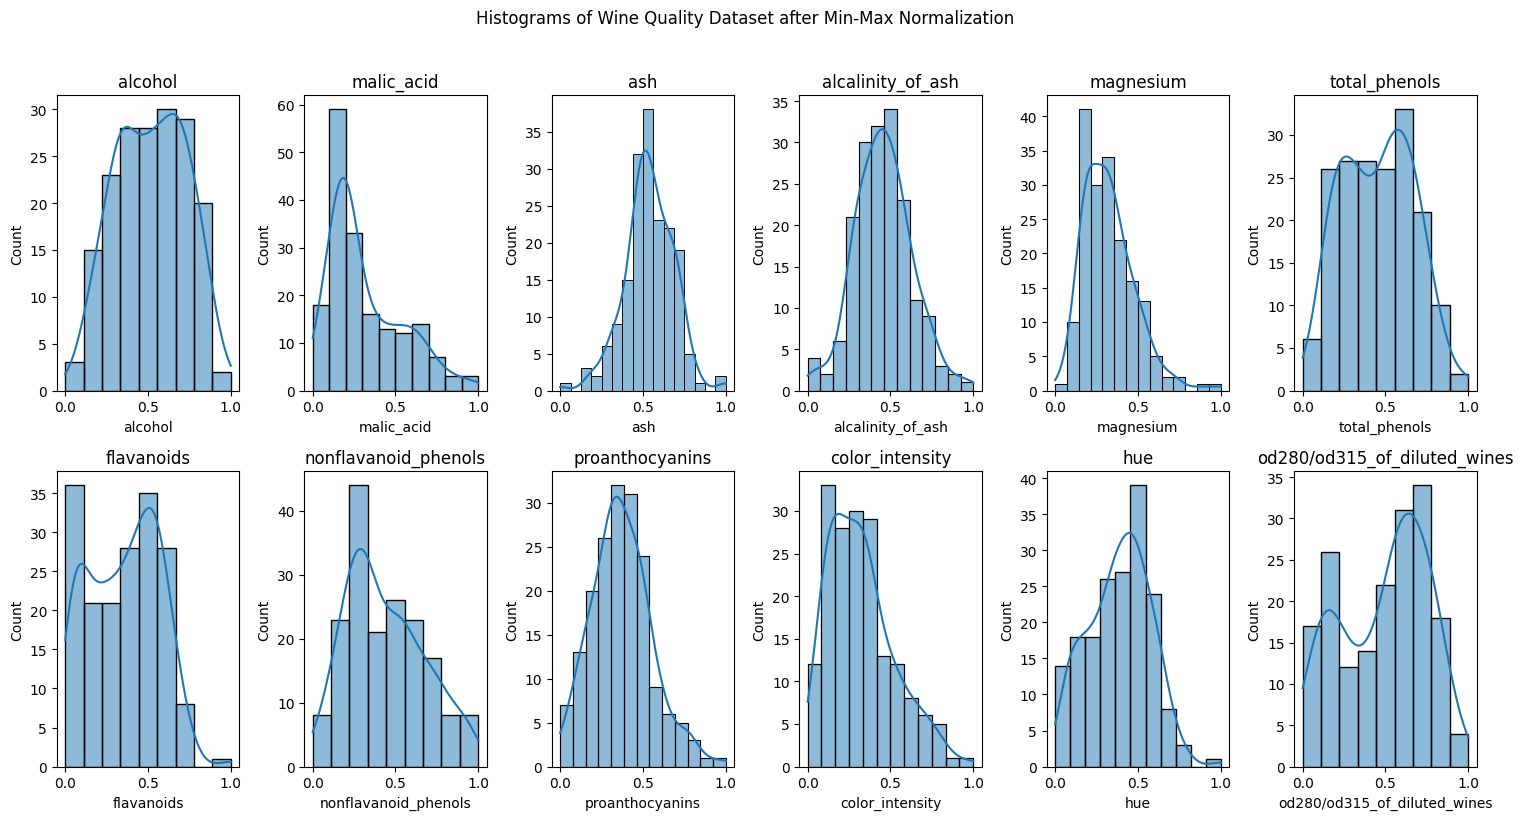

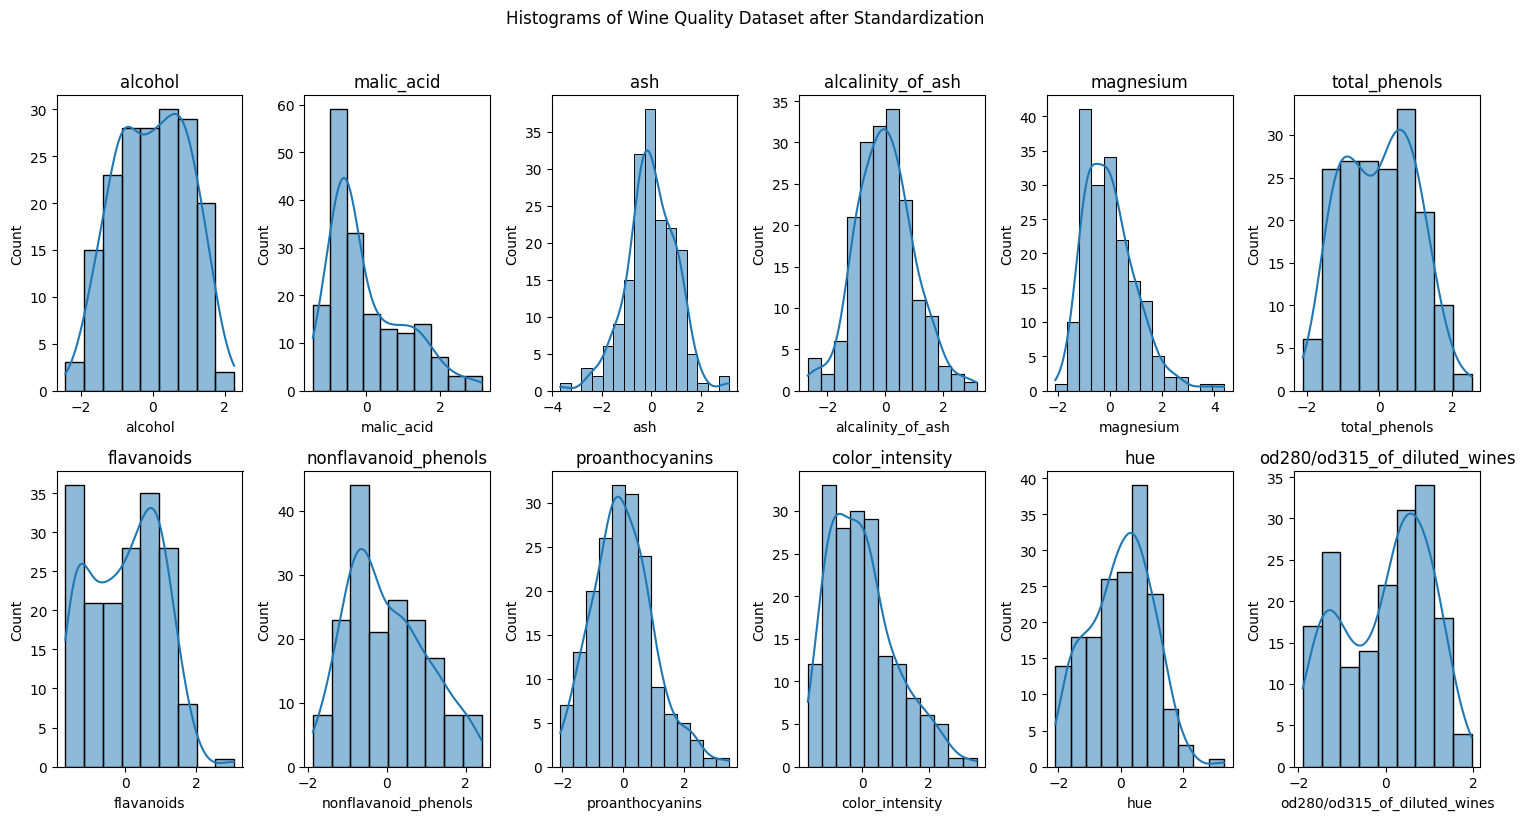

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_wine

# Load the Wine Quality dataset
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Select only numerical features for scaling
numerical_features = wine_df.columns

# Function to plot histograms of features
def plot_histograms(df, title):
    fig, axes = plt.subplots(nrows=2, ncols=len(df.columns) // 2, figsize=(15, 8))
    fig.suptitle(title, y=1.02)
    for ax, feat in zip(axes.flatten(), df.columns):
        sns.histplot(df[feat], ax=ax, kde=True)
        ax.set_title(feat)
    plt.tight_layout()
    plt.show()

# Plot histograms of original data
plot_histograms(wine_df, title="Histograms of Original Wine Quality Dataset")

# Apply Min-Max normalization
scaler = MinMaxScaler()
wine_df_normalized = pd.DataFrame(scaler.fit_transform(wine_df), columns=wine_df.columns)

# Plot histograms after normalization
plot_histograms(wine_df_normalized, title="Histograms of Wine Quality Dataset after Min-Max Normalization")

# Apply standardization
scaler = StandardScaler()
wine_df_standardized = pd.DataFrame(scaler.fit_transform(wine_df), columns=wine_df.columns)

# Plot histograms after standardization
plot_histograms(wine_df_standardized, title="Histograms of Wine Quality Dataset after Standardization")


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
file_path = '/content/retail_sales_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Check for missing values
print("Missing Values Before Imputation:")
print(df.isnull().sum())

# Handle date columns (if any) before imputation
# Example: If 'Date' is the column with the date string
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime object
    df['Date'] = df['Date'].view('int64') // 10 ** 9  # Convert to Unix timestamp (numerical)

# Select only numerical columns for imputation
numerical_df = df.select_dtypes(include=['number'])

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed_numerical = pd.DataFrame(knn_imputer.fit_transform(numerical_df), columns=numerical_df.columns)
print("Dataset After KNN Imputation (Numerical):")
print(df_knn_imputed_numerical.head())

# MICE Imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
df_mice_imputed_numerical = pd.DataFrame(mice_imputer.fit_transform(numerical_df), columns=numerical_df.columns)
print("Dataset After MICE Imputation (Numerical):")
print(df_mice_imputed_numerical.head())

# Check for missing values after imputation
print("Missing Values After KNN Imputation (Numerical):")
print(df_knn_imputed_numerical.isnull().sum())
print("Missing Values After MICE Imputation (Numerical):")
print(df_mice_imputed_numerical.isnull().sum())

# Optionally, merge imputed numerical data back with original non-numerical columns
# df_knn_imputed = df.copy()
# df_knn_imputed[numerical_df.columns] = df_knn_imputed_numerical

Original Dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Missing Values Before Imputation:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Dataset After KNN Impu

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/heart_disease_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Check for the basic statistics and missing values
print(df.describe())
print(df.isnull().sum())

# Create age groups
def age_group(age):
    if age < 30:
        return 'Under 30'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    else:
        return '70+'

df['AgeGroup'] = df['age'].apply(age_group)

# Create cholesterol level categories
def cholesterol_level(chol):
    if chol < 200:
        return 'Normal'
    elif 200 <= chol < 240:
        return 'Borderline High'
    else:
        return 'High'

df['CholesterolLevel'] = df['chol'].apply(cholesterol_level)

# Create BMI categories (assuming 'bmi' column exists)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

if 'bmi' in df.columns:
    df['BMICategory'] = df['bmi'].apply(bmi_category)

# Create blood pressure categories (assuming 'trestbps' column exists)
def bp_category(bp):
    if bp < 120:
        return 'Normal'
    elif 120 <= bp < 130:
        return 'Elevated'
    elif 130 <= bp < 140:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

if 'trestbps' in df.columns:
    df['BPCategory'] = df['trestbps'].apply(bp_category)

# Display the first few rows of the dataset with new features
print("Dataset with New Features:")
print(df.head())


Original Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.0000

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Load the dataset
day_data = pd.read_csv('/content/day.csv')

# Display basic information and statistics
day_data_info = day_data.info()
day_data_stats = day_data.describe()

day_data_info, day_data_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(None,
           instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
 25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
 50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
 75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
 max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   
 
        workingday  weathersit        temp       atemp         hum   windspeed  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
 std   

In [5]:
# Calculate skewness for numerical columns
skewness = day_data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].skew()

skewness


temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

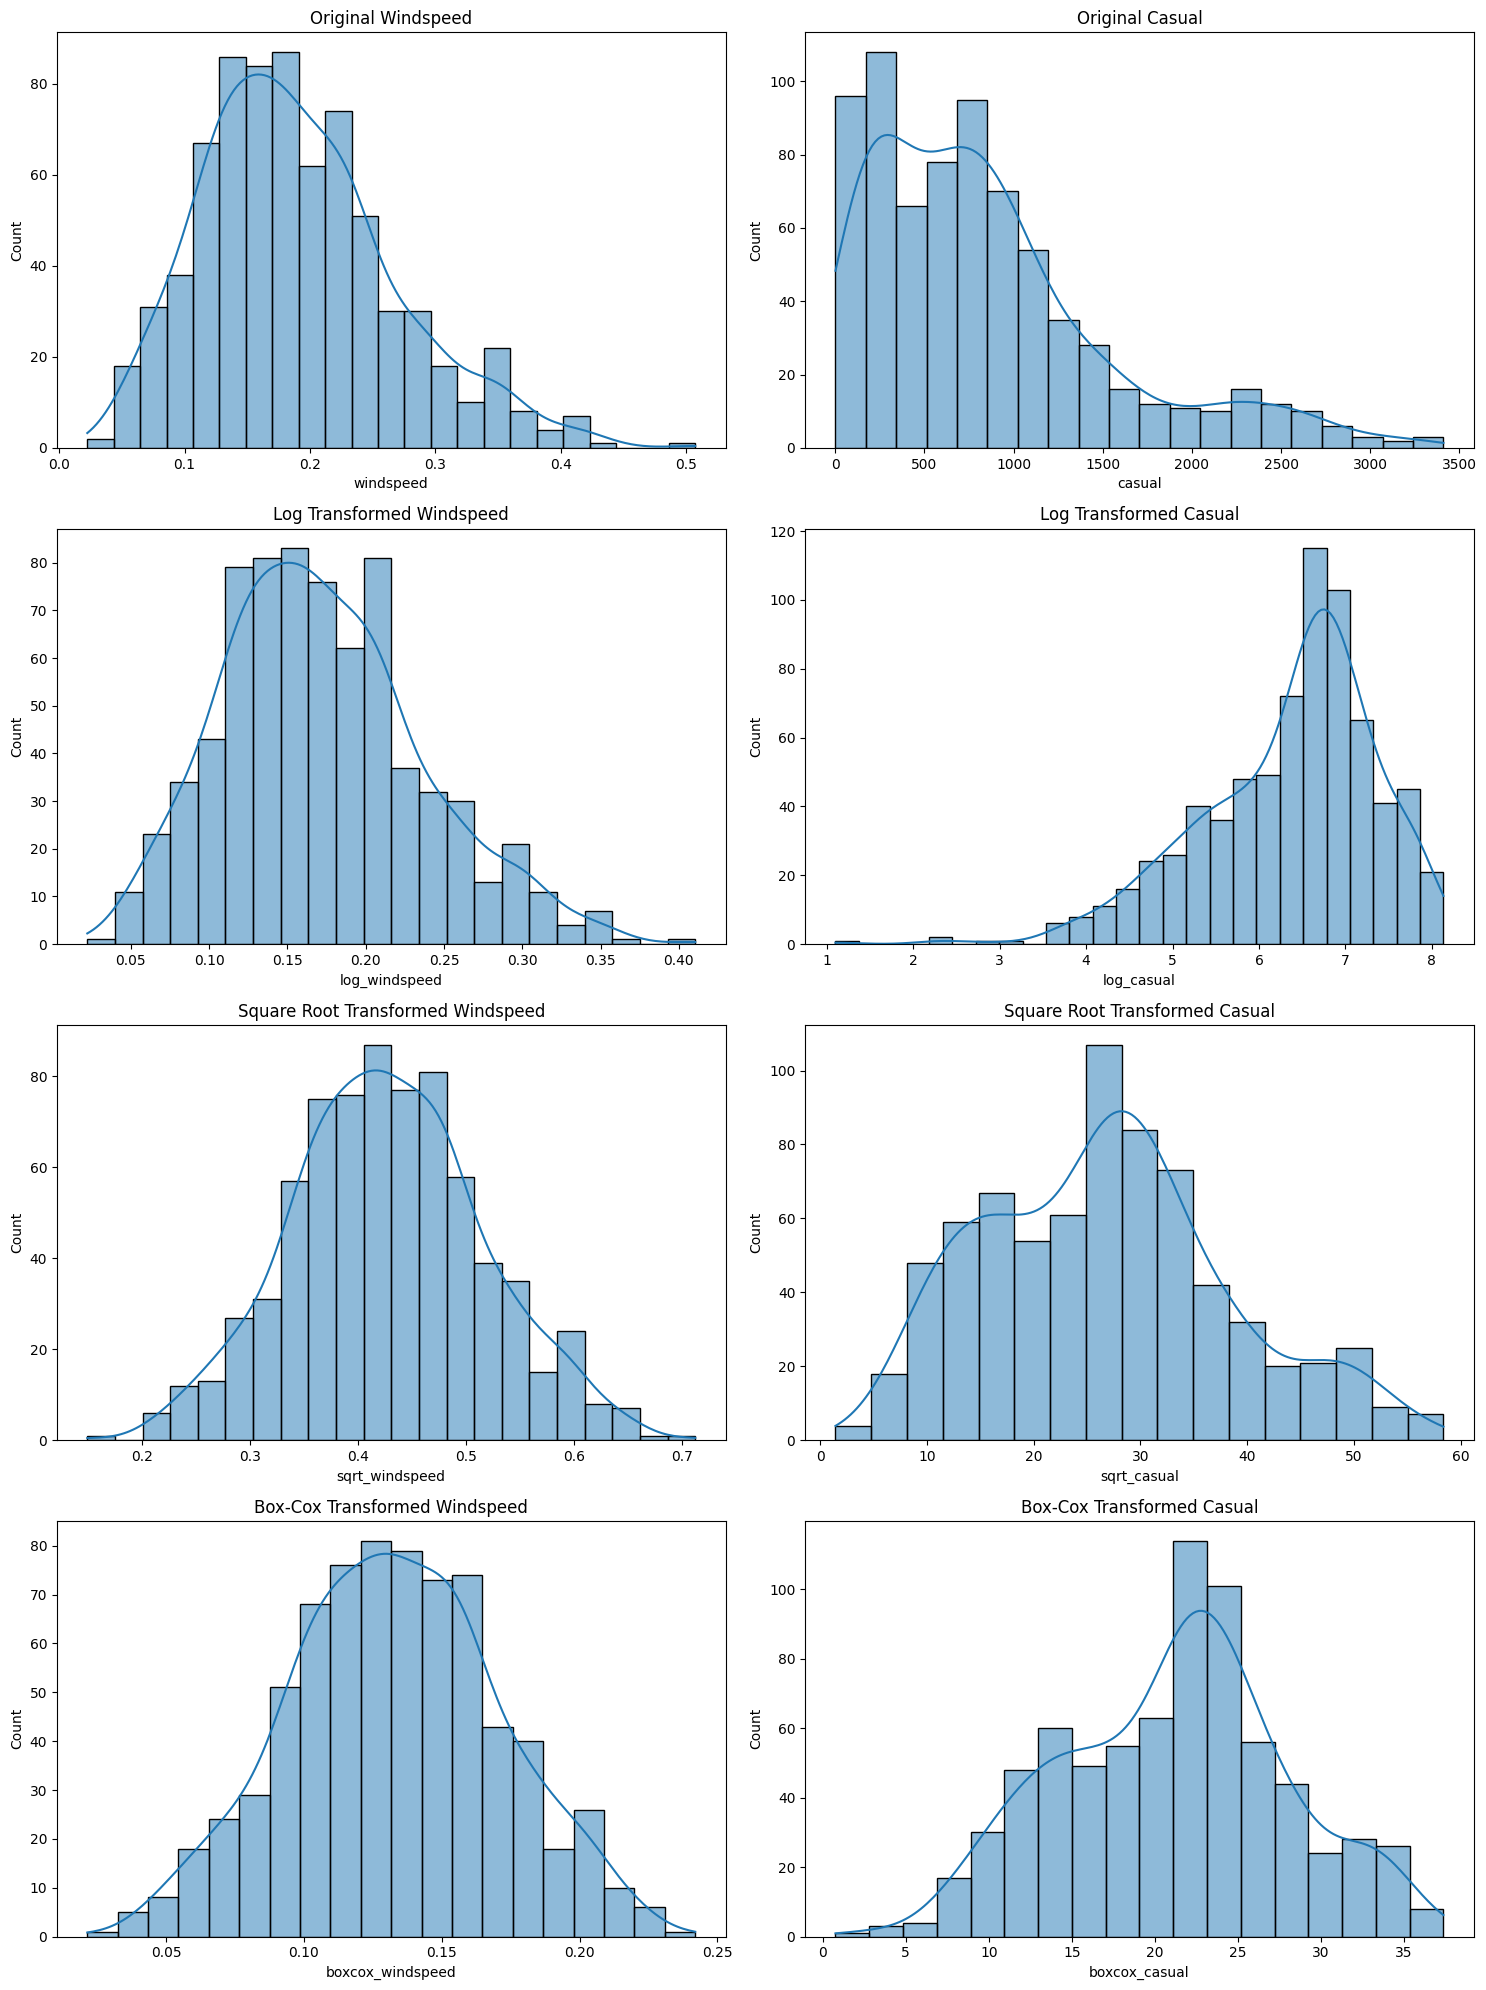

In [6]:
# Apply transformations to 'windspeed' and 'casual'
# Log transformation
day_data['log_windspeed'] = np.log1p(day_data['windspeed'])
day_data['log_casual'] = np.log1p(day_data['casual'])

# Square root transformation
day_data['sqrt_windspeed'] = np.sqrt(day_data['windspeed'])
day_data['sqrt_casual'] = np.sqrt(day_data['casual'])

# Box-Cox transformation
day_data['boxcox_windspeed'], _ = boxcox(day_data['windspeed'] + 1)  # Add 1 to handle zero values
day_data['boxcox_casual'], _ = boxcox(day_data['casual'])

# Plot the distributions before and after transformations
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Original distributions
sns.histplot(day_data['windspeed'], kde=True, ax=axes[0, 0]).set(title='Original Windspeed')
sns.histplot(day_data['casual'], kde=True, ax=axes[0, 1]).set(title='Original Casual')

# Log transformed distributions
sns.histplot(day_data['log_windspeed'], kde=True, ax=axes[1, 0]).set(title='Log Transformed Windspeed')
sns.histplot(day_data['log_casual'], kde=True, ax=axes[1, 1]).set(title='Log Transformed Casual')

# Square root transformed distributions
sns.histplot(day_data['sqrt_windspeed'], kde=True, ax=axes[2, 0]).set(title='Square Root Transformed Windspeed')
sns.histplot(day_data['sqrt_casual'], kde=True, ax=axes[2, 1]).set(title='Square Root Transformed Casual')

# Box-Cox transformed distributions
sns.histplot(day_data['boxcox_windspeed'], kde=True, ax=axes[3, 0]).set(title='Box-Cox Transformed Windspeed')
sns.histplot(day_data['boxcox_casual'], kde=True, ax=axes[3, 1]).set(title='Box-Cox Transformed Casual')

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Load the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Display basic information and statistics
print(diabetes_data.info())
print(diabetes_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

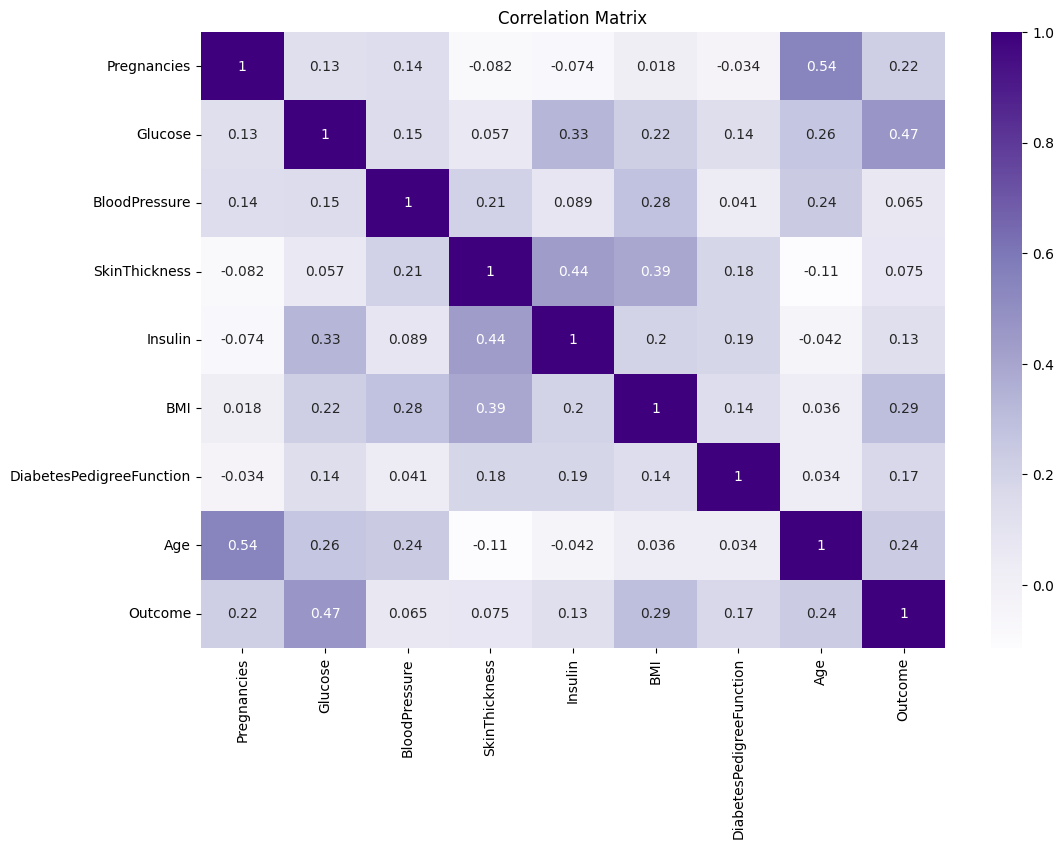

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = diabetes_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples')
plt.title('Correlation Matrix')
plt.show()


In [9]:
from sklearn.feature_selection import mutual_info_classif

# Assuming the target variable is named 'Outcome'
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Compute mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for visualization
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df)


                    Feature  Mutual Information
1                   Glucose            0.105059
5                       BMI            0.080501
0               Pregnancies            0.057438
7                       Age            0.052790
3             SkinThickness            0.028419
4                   Insulin            0.019779
2             BloodPressure            0.010230
6  DiabetesPedigreeFunction            0.009980


In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a model (Logistic Regression in this case)
model = LogisticRegression(max_iter=10000)

# Create the RFE object and rank each feature
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

# Print the ranking of the features
print('Feature Ranking:', fit.ranking_)
print('Selected Features:', X.columns[fit.support_])


Feature Ranking: [1 1 2 4 3 1 1 1]
Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [12]:
import pandas as pd

# Load the dataset
credit_data = pd.read_csv('/content/creditcard.csv')

# Display basic information and statistics
print(credit_data.info())
print(credit_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

Class
0.0    5970
1.0       3
Name: count, dtype: int64


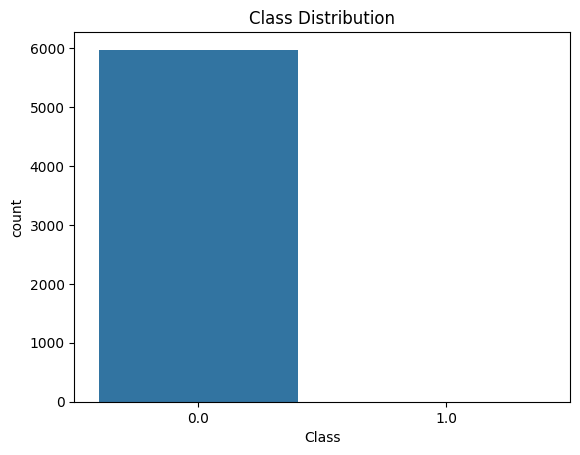

In [13]:
# Check the distribution of the target variable
print(credit_data['Class'].value_counts())

# Plot the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=credit_data)
plt.title('Class Distribution')
plt.show()


In [18]:
from imblearn.over_sampling import SMOTE
# Check for missing values in the target variable
print(y.isnull().sum())

# If there are missing values, you'll need to handle them.
# Common strategies include:

# 1. Removing rows with missing target values:
credit_data = credit_data.dropna(subset=['Class'])  # Replace 'Class' with the actual name of your target column

# 2. Imputing missing values (e.g., with the mean, median, or a more sophisticated method):
# This is generally not recommended for target variables, especially in classification problems.

# After handling missing values, re-separate features and target:
X = credit_data.drop('Class', axis=1)  # Replace 'Class' with the actual name of your target column
y = credit_data['Class']

# Now apply SMOTE:
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduced k_neighbors to 2
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_smote).value_counts())


0
Class
0.0    5970
1.0    5970
Name: count, dtype: int64


In [22]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42 , n_neighbors = 2)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_adasyn).value_counts())


Class
0.0    5970
1.0    5970
Name: count, dtype: int64


In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_under).value_counts())


Class
0.0    3
1.0    3
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to train and evaluate the model
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate on original data
print("Original Data:")
evaluate_model(X, y)

# Evaluate on SMOTE balanced data
print("SMOTE Balanced Data:")
evaluate_model(X_smote, y_smote)

# Evaluate on ADASYN balanced data
print("ADASYN Balanced Data:")
evaluate_model(X_adasyn, y_adasyn)

# Evaluate on undersampled data
print("Undersampled Data:")
evaluate_model(X_under, y_under)


Original Data:
[[1791    0]
 [   1    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       1.00      1.00      1.00      1792

SMOTE Balanced Data:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1822    3]
 [   0 1757]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1825
         1.0       1.00      1.00      1.00      1757

    accuracy                           1.00      3582
   macro avg       1.00      1.00      1.00      3582
weighted avg       1.00      1.00      1.00      3582

ADASYN Balanced Data:
[[1822    3]
 [   0 1757]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1825
         1.0       1.00      1.00      1.00      1757

    accuracy                           1.00      3582
   macro avg       1.00      1.00      1.00      3582
weighted avg       1.00      1.00      1.00      3582

Undersampled Data:
[[1 1]
 [0 0]]
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
import pandas as pd
import os

# File paths
genre_file_path = '/content/u.genre'
user_file_path = '/content/u.user'
data_file_path = '/content/u.data'
item_file_path = '/content/u.item'

# Load datasets
genre_df = pd.read_csv(genre_file_path, sep='|', header=None, names=['genre', 'genre_id'])
user_df = pd.read_csv(user_file_path, sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
item_df = pd.read_csv(item_file_path, sep='|', header=None, encoding='latin-1',
                      names=['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                             'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                             'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                             'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
# Load data_df regardless of file existence, handle potential errors
if os.path.exists(data_file_path):
    data_df = pd.read_csv(data_file_path, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
else:
    # Handle the case where the file doesn't exist, e.g., create an empty DataFrame
    data_df = pd.DataFrame(columns=['user_id', 'item_id', 'rating', 'timestamp'])

# Preprocessing
# Convert timestamp to datetime
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'], unit='s')

# Merge datasets
# Merge data_df with user_df on 'user_id'
merged_df = pd.merge(data_df, user_df, on='user_id', how='left')

# Merge the resulting dataframe with item_df on 'item_id'
merged_df = pd.merge(merged_df, item_df, on='item_id', how='left')

# Merge the resulting dataframe with genre_df on genre information
# We need to melt the item_df to merge it properly with genre_df
item_genres = item_df.melt(id_vars=['item_id', 'title', 'release_date'],
                           value_vars=item_df.columns[6:],
                           var_name='genre',
                           value_name='is_genre')
item_genres = item_genres[item_genres['is_genre'] == 1].drop('is_genre', axis=1)
combined_df = pd.merge(merged_df, item_genres, on='item_id', how='left')
combined_df = pd.merge(combined_df, genre_df, on='genre', how='left')

# Display the combined dataframe
print(combined_df.head())


Empty DataFrame
Columns: [rating, timestamp, user_id, age, gender, occupation, zip_code, title_x, release_date_x, video_release_date, IMDb_URL, unknown, Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, item_id, title_y, release_date_y, genre, genre_id]
Index: []

[0 rows x 35 columns]
